In [102]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [103]:
df = pd.read_csv("fake-news/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [104]:
x_train, x_test, y_train, y_test = train_test_split(df['text'].fillna(' '),  df['label'], test_size=0.2)
print("DONE")

DONE


In [105]:
# count_vectorizer_train = CountVectorizer(stop_words='english', max_df=0.7)
# count_train = count_vectorizer_train.fit_transform(x_train)
# count_vectorizer_test = CountVectorizer(vocabulary=count_vectorizer_train.vocabulary_,stop_words='english', max_df=0.7)
# count_test = count_vectorizer_test.transform(x_test)
# print("DONE")

In [106]:
# Multiple nominal bayes algorithm
# clf1 = MultinomialNB()
# clf1.fit(count_train, y_train)
# pred = clf1.predict(count_test)
# score = accuracy_score(y_test, pred)
# print("accuracy:   %0.3f" % score)

In [107]:
count_vectorizer_train = CountVectorizer(stop_words='english', max_df=0.7)
count_train = count_vectorizer_train.fit_transform(x_train)
count_test = count_vectorizer_train.transform(x_test)
print("DONE")

DONE


In [108]:
# Multiple nominal bayes algorithm
clf1 = MultinomialNB()
clf1.fit(count_train, y_train)
pred = clf1.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.894


In [109]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


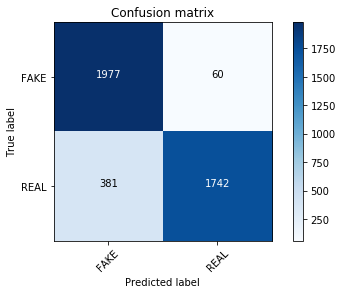

In [110]:
cm = confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
# clf2 = PassiveAggressiveClassifier()
# clf2.fit(count_train, y_train)
# pred = clf2.predict(count_test)
# score = accuracy_score(y_test, pred)
# print("accuracy:   %0.3f" % score)

In [ ]:
# TLF-ID vecotorization
# Hashing vecotorization
# Add title and author in text
# Add title and author as features